<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/Implementing_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Given a salary dataset with years of experience and the corresponding salary, use an ML model to predict new salsry of people based on some different years of experience

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
salary_data  = pd.read_csv("/content/Salary_Data (1).csv")
X = salary_data["YearsExperience"].values
Y = salary_data["Salary"].values

In [33]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [34]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

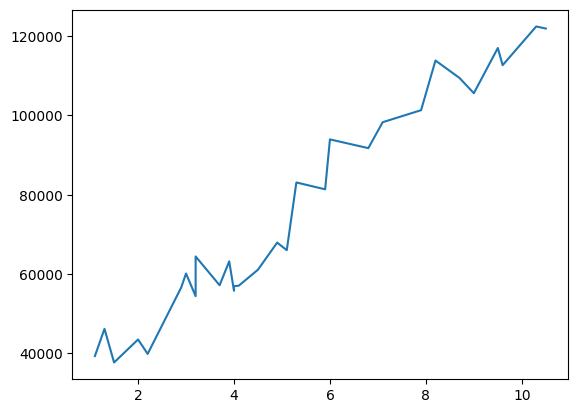

In [35]:
plt.plot(X,Y)

Normalizing the dataset

In [36]:
X = np.array(X)
Y = np.array(Y)

In [37]:
def mean(X):
  return np.sum(X)/len(X)

In [38]:
def variance(X):
  mean_value = mean(X)
  return np.sum((X-mean_value)**2)/len(X)

In [39]:
def norm(X):
  mean_value = mean(X)
  variance_value = variance(X)
  return (X - mean_value)/np.sqrt(variance_value)

In [40]:
X_norm = norm(X)

In [41]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

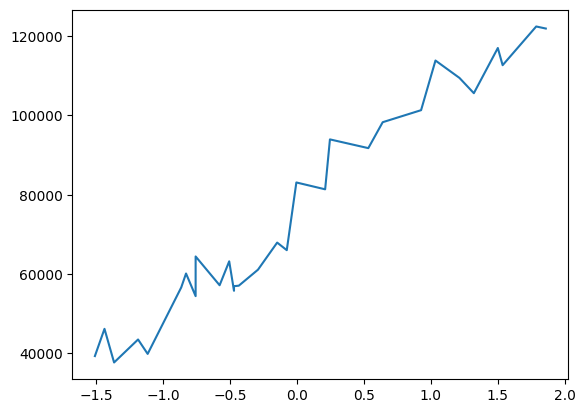

In [42]:
plt.plot(X_norm,Y)

Learning Rate

Threshold value

Max no. of Iteration

In [47]:
import random

In [54]:
class SimpleLR:
  def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
    self.lr = lr
    self.max_iter = max_iter
    self.threshold = threshold
    self.weight = random.uniform(-1,1)
    self.bias = random.uniform(-1,1)

  def predict(self, X):
    return self.weight*X + self.bias

  def fit(self, X, Y):
    n = len(X)
    loss_history = []
    y_pred= self.predict(X)
    errors = Y-y_pred
    prev_loss = (1/(2*n)) * np.sum(errors**2)
    loss_history.append(prev_loss)
    for i in range(self.max_iter):
      w_grad = (1/n) * np.sum(errors*X)
      b_grad = (1/n) * np.sum(errors)
      self.weight += self.lr * w_grad
      self.bias += self.lr * b_grad
      y_pred = self.predict(X)
      errors = Y-y_pred
      curr_loss = (1/(2*n)) * np.sum(errors**2)
      if np.abs(curr_loss - prev_loss) < self.threshold:
        break
        prev_loss = curr_loss
      loss_history.append(curr_loss)
    return loss_history

  def plot(self, X, Y):
    y_pred = self.predict(X)
    plt.plot(X,Y)
    plt.plot(X,y_pred)

In [55]:
model = SimpleLR()

In [56]:
loss_history = model.fit(X_norm, Y)

In [57]:
loss_history

[np.float64(3251473052.576418),
 np.float64(2636663913.000515),
 np.float64(2138668509.9440339),
 np.float64(1735292233.4682844),
 np.float64(1408557449.522927),
 np.float64(1143902274.5271873),
 np.float64(929531582.7806386),
 np.float64(755891322.4659338),
 np.float64(615242711.6110231),
 np.float64(501317336.81854546),
 np.float64(409037783.23663855),
 np.float64(334291344.83529395),
 np.float64(273746729.7302047),
 np.float64(224705591.49508253),
 np.float64(184982269.52463353),
 np.float64(152806378.7285699),
 np.float64(126743907.18375826),
 np.float64(105633305.23246084),
 np.float64(88533717.65190999),
 np.float64(74683051.7116638),
 np.float64(63464012.30006436),
 np.float64(54376590.37666886),
 np.float64(47015778.61871847),
 np.float64(41053521.09477862),
 np.float64(36224092.50038737),
 np.float64(32312255.338930435),
 np.float64(29143667.238150384),
 np.float64(26577110.876518477),
 np.float64(24498200.223596655),
 np.float64(22814282.594729953),
 np.float64(21450309.31534

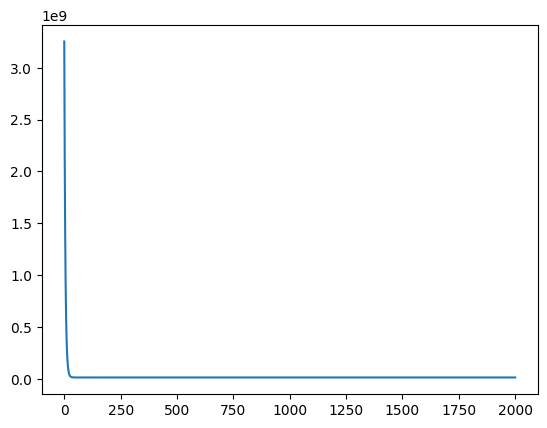

In [58]:
plt.plot(loss_history)

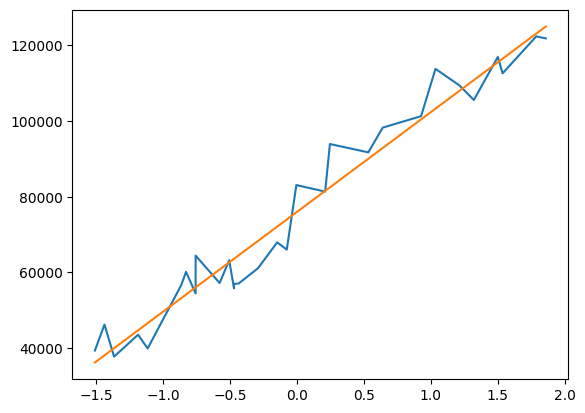

In [59]:
model.plot(X_norm, Y)